## Hierarchical clustering

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sn

In [2]:
data = pd.read_excel('EastWestAirlines.xlsx', sheet_name = 'data')
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
data = data.rename({'ID#':'ID','Award?':'Award'},axis = 1) 
data 

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
def norm_func(i): 
        x = (i-i.min())/(i.max()-i.min())
        return(x)

In [5]:
df_norm = norm_func(data.iloc[:,1:]) 
df_norm 

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


In [6]:
from sklearn.preprocessing import MinMaxScaler 
trans = MinMaxScaler() 
data1 = pd.DataFrame(trans.fit_transform(data.iloc[:,1:])) 
data1  

,0,1,2,3,4,5,6,7,8,9,10
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


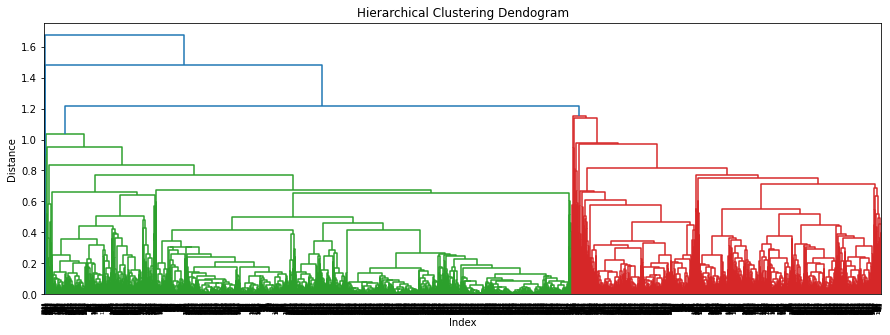

In [7]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch 
z = linkage(df_norm,method="average",metric="euclidean") 
plt.figure(figsize=(15,5)) 
plt.title("Hierarchical Clustering Dendogram") 
plt.xlabel("Index") 
plt.ylabel("Distance") 
sch.dendrogram(
    z,
)
plt.show()

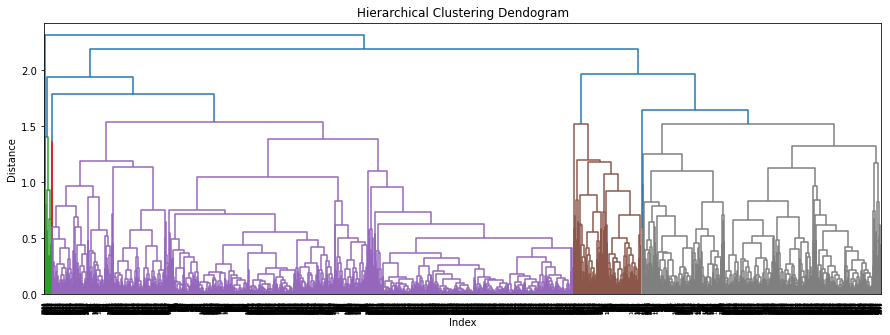

In [8]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch 
z = linkage(df_norm,method="complete",metric="euclidean") 
plt.figure(figsize=(15,5)) 
plt.title("Hierarchical Clustering Dendogram") 
plt.xlabel("Index") 
plt.ylabel("Distance") 
sch.dendrogram(
    z,
)
plt.show()

In [9]:
from sklearn.cluster import AgglomerativeClustering 
import warnings 
warnings.filterwarnings("ignore") 
h_complete = AgglomerativeClustering(n_clusters=3,linkage="average",affinity="euclidean").fit(df_norm) 
cluster_labels = pd.Series(h_complete.labels_) 
cluster_labels 
data["clust"] = cluster_labels 
data 

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [10]:
hc=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage = 'complete')

In [11]:
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [12]:
df_norm['h_clusterid'] = Clusters
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,2
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,2
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,2
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,2
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0,0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0,0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0,0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0,2


In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.iloc[:,1:]) 

In [14]:
scaled_data 

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.39545434e+00, -7.66919299e-01, -3.35641029e-02],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.37995704e+00, -7.66919299e-01, -3.35641029e-02],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.41192021e+00, -7.66919299e-01, -3.35641029e-02],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -1.31560393e+00,  1.30391816e+00, -3.35641029e-02],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -1.31608822e+00, -7.66919299e-01, -3.35641029e-02],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -1.31754109e+00, -7.66919299e-01, -3.35641029e-02]])

## kmeans

In [15]:
from sklearn.cluster import KMeans 

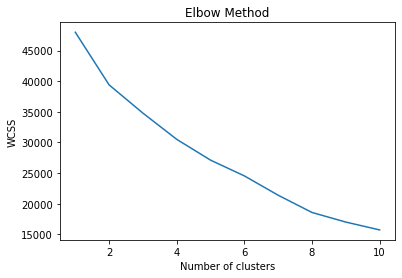

In [16]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [17]:
cluster_new = KMeans(4, random_state=42)
cluster_new.fit(scaled_data) 

KMeans(n_clusters=4, random_state=42)

In [18]:
cluster_new.labels_

array([1, 1, 1, ..., 0, 1, 1])

In [19]:
data['clusterid_new'] = cluster_new.labels_
data 

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clust,clusterid_new
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0,1


In [20]:
data.groupby('clusterid_new').agg(['mean']).reset_index() 

,clusterid_new,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clust
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1608.141920,118056.195242,88.607875,3.773585,1.002461,1.037736,40982.070550,18.919606,310.036095,0.913864,4872.366694,0.643150,0.0
1,1,2231.760031,44265.738995,81.092715,1.240748,1.018309,1.000390,4844.531749,7.006233,187.039346,0.579665,3714.596416,0.204129,0.0
2,2,2558.200000,446567.200000,277.600000,2.200000,1.000000,1.000000,55929.000000,61.800000,16932.600000,44.000000,3216.800000,1.000000,1.2
3,3,1707.783654,166145.283654,1243.980769,2.115385,1.038462,1.009615,28315.086538,24.225962,4312.673077,12.841346,4707.937500,0.807692,0.0


In [21]:
data[data['clusterid_new']==3]

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clust,clusterid_new
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,0,3
21,22,185681,2024,1,1,1,13300,16,1800,9,6896,1,0,3
22,23,20584,0,1,1,1,3450,11,3450,11,6884,0,0,3
42,43,60313,0,1,1,1,10000,26,3250,9,7829,1,0,3
50,51,108137,0,1,1,1,6368,5,6368,5,6844,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3907,3930,126490,0,1,1,1,8808,15,5183,12,1566,0,0,3
3911,3934,55922,2273,1,1,1,8104,19,4104,16,1552,0,0,3
3917,3940,130748,0,4,1,1,65510,37,6349,7,1545,0,0,3
3934,3957,76595,0,1,1,1,10577,2,9577,1,1515,0,0,3


In [22]:
data[data['clusterid_new']==0]

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clust,clusterid_new
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,0
6,7,84914,0,3,1,1,27482,25,0,0,6994,0,0,0
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,0,0
11,12,96522,0,5,1,1,61105,19,0,0,6924,1,0,0
15,16,28495,0,4,1,1,49442,15,0,0,6912,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3979,4002,57793,0,3,1,1,20959,15,1198,3,1424,1,0,0
3980,4003,28867,0,3,1,1,19169,28,0,0,1425,0,0,0
3985,4008,59017,0,4,1,1,34746,25,0,0,1418,0,0,0
3991,4014,39142,0,3,1,1,14981,28,0,0,1408,0,0,0


## DBscan

In [23]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
print(data.head())

   ID  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0   1    28143           0          1          1          1          174   
1   2    19244           0          1          1          1          215   
2   3    41354           0          1          1          1         4123   
3   4    14776           0          1          1          1          500   
4   5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award  \
0            1                  0                0               7000      0   
1            2                  0                0               6968      0   
2            4                  0                0               7034      0   
3            1                  0                0               6952      0   
4           26               2077                4               6935      1   

   clust  clusterid_new  
0      0              1  
1      0  

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award              3999 non-null   int64
 12  clust              3999 non-null   int64
 13  clusterid_new      3999 non-null   int32
dtypes: int32(1), int64(13)
memory usage: 421.9 KB


In [26]:
array = data.values
array

array([[    1, 28143,     0, ...,     0,     0,     1],
       [    2, 19244,     0, ...,     0,     0,     1],
       [    3, 41354,     0, ...,     0,     0,     1],
       ...,
       [ 4019, 73597,     0, ...,     1,     0,     0],
       [ 4020, 54899,     0, ...,     0,     0,     1],
       [ 4021,  3016,     0, ...,     0,     0,     1]], dtype=int64)

In [27]:
stscaler=StandardScaler().fit(data.values)
x=stscaler.transform(data.values)
x

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -7.66919299e-01, -3.35641029e-02,  2.89748430e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -7.66919299e-01, -3.35641029e-02,  2.89748430e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -7.66919299e-01, -3.35641029e-02,  2.89748430e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
         1.30391816e+00, -3.35641029e-02, -1.16226156e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -7.66919299e-01, -3.35641029e-02,  2.89748430e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -7.66919299e-01, -3.35641029e-02,  2.89748430e-01]])

In [28]:
dbscan = DBSCAN(eps=0.8, min_samples=12)
dbscan.fit(x)

DBSCAN(eps=0.8, min_samples=12)

In [29]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, ..., 2, 0, 0], dtype=int64)

In [30]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl

,cluster
0,0
1,0
2,0
3,0
4,-1
...,...
3994,1
3995,1
3996,2
3997,0


 cluster 4 noise

In [31]:
# cluster 4 noise
pd.concat([data,cl],axis=1)

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clust,clusterid_new,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,1,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,1,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,1,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,1,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0,0,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0,1,0
